# Background

This data comes from AT&T. 

# Goal

Identify key performance indicators. 

In [1]:
# Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Acquire

 The data in stored in two separate csv files. One contains english speaking reps and the other contains bilingual reps. 

In [2]:
bilingual_reps = pd.read_csv('bilingual.csv')
bilingual_reps.head()

,bilingual,id,percent_calls_noted,percent_convenience_fee_waivers,scheduled_open_hours,percent_schedule _adherence,percent_availability,percent_total_vs_total_etracs,percent_immediate_vs_total_etracs,percent_transfers,average_handle_time_english,calls_answered_english,calls_answered_spanish,average_handle_time_spanish,total_average_handle_time,call_tracker_compliance
0,True,EL2869,0.77,0.11,1319:40:00,0.94,0.93,0.50,0.42,0.40,191.69,2943,10984,268.07,251.93,0.87
1,True,MA6241,0.82,0.15,1300:14:00,0.92,0.90,0.47,0.39,0.27,325.68,1602,10142,328.43,328.06,0.99
2,True,BV6715,0.86,0.25,1350:43:00,0.94,0.95,0.53,0.46,0.11,262.74,4986,9620,254.82,257.52,0.86
3,True,AC449Q,0.73,0.38,1386:11:00,0.95,0.91,0.49,0.39,0.30,295.84,2847,9481,323.84,317.38,0.81
4,True,JC8476,0.81,0.23,1414:22:00,0.95,0.91,0.46,0.38,0.36,277.51,5114,9162,294.98,288.72,0.92


In [3]:
bilingual_reps.dtypes

bilingual                               bool
id                                    object
percent_calls_noted                  float64
percent_convenience_fee_waivers      float64
scheduled_open_hours                  object
percent_schedule _adherence          float64
percent_availability                 float64
percent_total_vs_total_etracs        float64
percent_immediate_vs_total_etracs    float64
percent_transfers                    float64
average_handle_time_english          float64
calls_answered_english                 int64
calls_answered_spanish                 int64
average_handle_time_spanish          float64
total_average_handle_time            float64
call_tracker_compliance              float64
dtype: object

In [4]:
english_reps = pd.read_csv('english.csv')
english_reps.head()

,bilingual,id,percent_calls_noted,percent_convenience_fee_waivers,scheduled_open_hours,percent_schedule _adherence,percent_availability,percent_total_vs_total_etracs,percent_immediate_vs_total_etracs,percent_transfers,average_handle_time_english,calls_answered_english,calls_answered_spanish,average_handle_time_spanish,total_average_handle_time,call_tracker_compliance
0,False,GH2307,0.83,0.31,42:37:00,0.98,0.97,0.41,0.35,0.24,370.97,501,0,0,370.97,0.99
1,False,JR1401,0.84,0.33,94:14:00,0.96,0.93,0.46,0.43,0.22,335.49,918,0,0,335.49,0.87
2,False,MG3238,0.73,0.47,109:28:00,0.95,0.98,0.50,0.45,0.22,325.86,1036,0,0,325.86,0.99
3,False,PI1732,0.82,0.52,207:10:00,0.97,0.96,0.50,0.41,0.20,329.32,2010,0,0,329.32,1.00
4,False,GC800E,0.87,0.50,569:06:00,0.94,0.95,0.45,0.36,0.30,364.24,4943,0,0,364.24,0.98


In [5]:
english_reps.dtypes

bilingual                               bool
id                                    object
percent_calls_noted                  float64
percent_convenience_fee_waivers      float64
scheduled_open_hours                  object
percent_schedule _adherence          float64
percent_availability                 float64
percent_total_vs_total_etracs        float64
percent_immediate_vs_total_etracs    float64
percent_transfers                    float64
average_handle_time_english          float64
calls_answered_english                 int64
calls_answered_spanish                 int64
average_handle_time_spanish            int64
total_average_handle_time            float64
call_tracker_compliance              float64
dtype: object

# Prepare

In [6]:
# Combine two separate dataframes into one.
df = pd.concat([english_reps,bilingual_reps],axis=0, sort=False)
df.head()

,bilingual,id,percent_calls_noted,percent_convenience_fee_waivers,scheduled_open_hours,percent_schedule _adherence,percent_availability,percent_total_vs_total_etracs,percent_immediate_vs_total_etracs,percent_transfers,average_handle_time_english,calls_answered_english,calls_answered_spanish,average_handle_time_spanish,total_average_handle_time,call_tracker_compliance
0,False,GH2307,0.83,0.31,42:37:00,0.98,0.97,0.41,0.35,0.24,370.97,501,0,0.0,370.97,0.99
1,False,JR1401,0.84,0.33,94:14:00,0.96,0.93,0.46,0.43,0.22,335.49,918,0,0.0,335.49,0.87
2,False,MG3238,0.73,0.47,109:28:00,0.95,0.98,0.50,0.45,0.22,325.86,1036,0,0.0,325.86,0.99
3,False,PI1732,0.82,0.52,207:10:00,0.97,0.96,0.50,0.41,0.20,329.32,2010,0,0.0,329.32,1.00
4,False,GC800E,0.87,0.50,569:06:00,0.94,0.95,0.45,0.36,0.30,364.24,4943,0,0.0,364.24,0.98


In [7]:
# Convert boolean column to integer
df['bilingual'] = df['bilingual'].astype(int)

In [8]:
df.head()

,bilingual,id,percent_calls_noted,percent_convenience_fee_waivers,scheduled_open_hours,percent_schedule _adherence,percent_availability,percent_total_vs_total_etracs,percent_immediate_vs_total_etracs,percent_transfers,average_handle_time_english,calls_answered_english,calls_answered_spanish,average_handle_time_spanish,total_average_handle_time,call_tracker_compliance
0,0,GH2307,0.83,0.31,42:37:00,0.98,0.97,0.41,0.35,0.24,370.97,501,0,0.0,370.97,0.99
1,0,JR1401,0.84,0.33,94:14:00,0.96,0.93,0.46,0.43,0.22,335.49,918,0,0.0,335.49,0.87
2,0,MG3238,0.73,0.47,109:28:00,0.95,0.98,0.50,0.45,0.22,325.86,1036,0,0.0,325.86,0.99
3,0,PI1732,0.82,0.52,207:10:00,0.97,0.96,0.50,0.41,0.20,329.32,2010,0,0.0,329.32,1.00
4,0,GC800E,0.87,0.50,569:06:00,0.94,0.95,0.45,0.36,0.30,364.24,4943,0,0.0,364.24,0.98


In [9]:
df.dtypes

bilingual                              int64
id                                    object
percent_calls_noted                  float64
percent_convenience_fee_waivers      float64
scheduled_open_hours                  object
percent_schedule _adherence          float64
percent_availability                 float64
percent_total_vs_total_etracs        float64
percent_immediate_vs_total_etracs    float64
percent_transfers                    float64
average_handle_time_english          float64
calls_answered_english                 int64
calls_answered_spanish                 int64
average_handle_time_spanish          float64
total_average_handle_time            float64
call_tracker_compliance              float64
dtype: object

In [10]:
# remove minutes and seconds from column
df['scheduled_open_hours'] = [re.sub(r':.+','', str(i)) for i in df['scheduled_open_hours']]
df['scheduled_open_hours'].head(5)

0     42
1     94
2    109
3    207
4    569
Name: scheduled_open_hours, dtype: object

In [11]:
# Convert string column to integer
df['scheduled_open_hours'] = df['scheduled_open_hours'].astype(int)

In [12]:
# Check for null values
df.isna().sum()

bilingual                            0
id                                   0
percent_calls_noted                  0
percent_convenience_fee_waivers      0
scheduled_open_hours                 0
percent_schedule _adherence          0
percent_availability                 0
percent_total_vs_total_etracs        0
percent_immediate_vs_total_etracs    0
percent_transfers                    0
average_handle_time_english          0
calls_answered_english               0
calls_answered_spanish               0
average_handle_time_spanish          0
total_average_handle_time            0
call_tracker_compliance              0
dtype: int64

# Explore

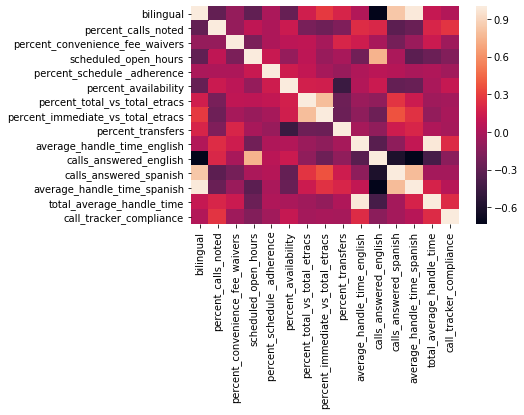

In [13]:
sns.heatmap(df.corr())

In [16]:
columns = list(df.columns)
columns

['bilingual',
 'id',
 'percent_calls_noted',
 'percent_convenience_fee_waivers',
 'scheduled_open_hours',
 'percent_schedule _adherence',
 'percent_availability',
 'percent_total_vs_total_etracs',
 'percent_immediate_vs_total_etracs',
 'percent_transfers',
 'average_handle_time_english',
 'calls_answered_english',
 'calls_answered_spanish',
 'average_handle_time_spanish',
 'total_average_handle_time',
 'call_tracker_compliance']

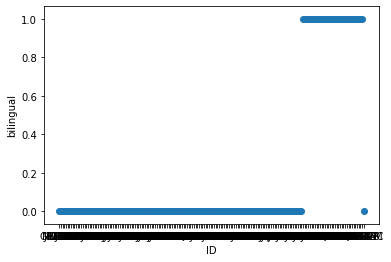

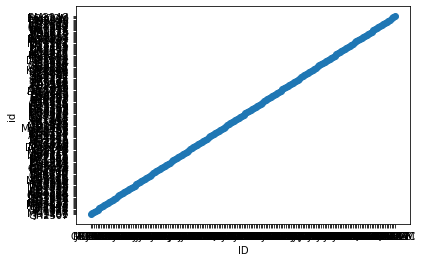

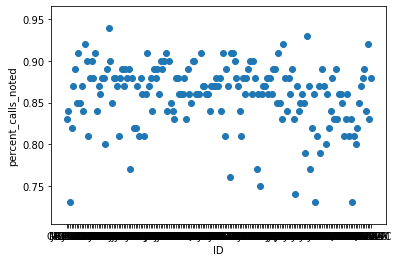

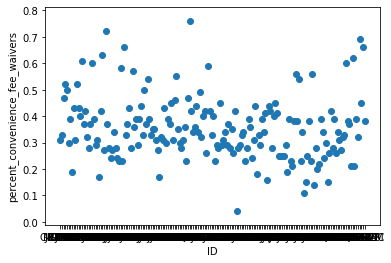

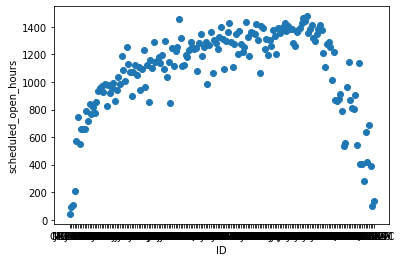

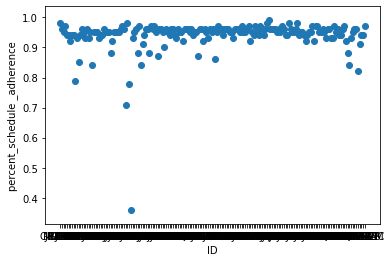

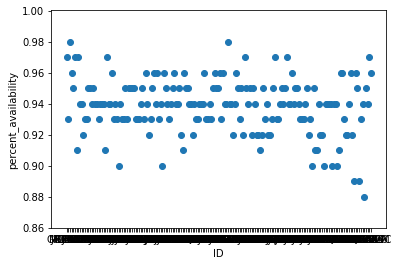

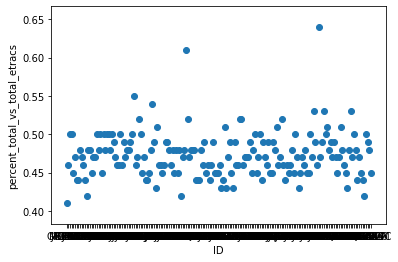

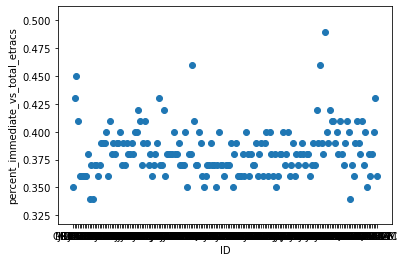

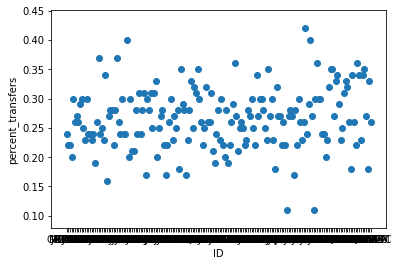

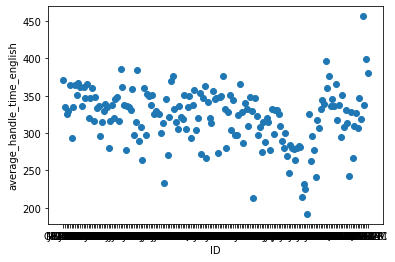

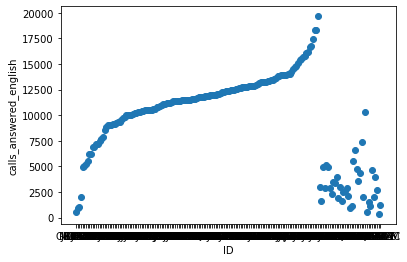

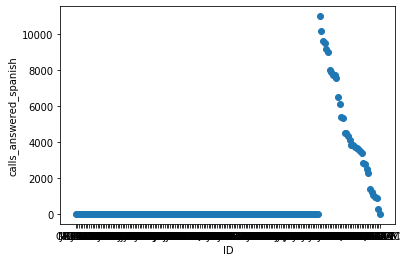

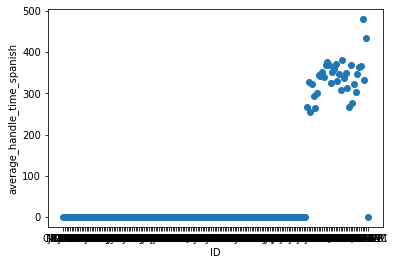

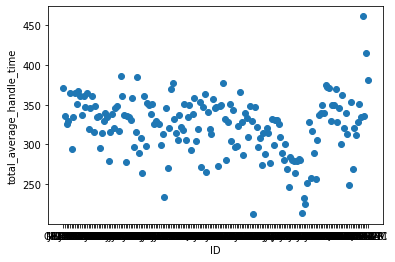

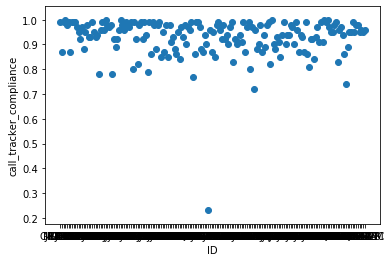

In [26]:
for c in columns:
    plt.scatter(data=df, x='id', y=c)
    plt.xlabel('ID')
    plt.ylabel(c)
    plt.show()

# Model